In [1]:
import pandas as pd
imgatt = pd.read_csv('./input/image_attribute_labels.txt', sep='\s+', header=None, error_bad_lines=False,
warn_bad_lines=False, usecols=[0,1,2], names=['imgid','attid','present'])


C:\Users\User\AppData\Local\Temp\ipykernel_21184\2964032150.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  imgatt = pd.read_csv('./input/image_attribute_labels.txt', sep='\s+', header=None, error_bad_lines=False,
C:\Users\User\AppData\Local\Temp\ipykernel_21184\2964032150.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  imgatt = pd.read_csv('./input/image_attribute_labels.txt', sep='\s+', header=None, error_bad_lines=False,


In [2]:
imgatt.head()
imgatt.shape

(3677856, 3)

In [3]:
imgatt2 = imgatt.pivot(index='imgid',columns='attid', values='present')


In [4]:
imgatt2.head()

attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]

In [5]:
imglabels = pd.read_csv('./input/image_class_labels.txt', sep=' ', header=None, names=['imgid','label'])
imglabels = imglabels.set_index('imgid')
print(imglabels.shape)

(11788, 1)


In [6]:
df = imgatt2.join(imglabels)
df = df.sample(frac=1)
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

df_att.head()
len(df_att)

11788

In [7]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']


In [8]:
%%time

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

model.fit(df_train_att, df_train_label)

CPU times: total: 10.6 s
Wall time: 11.8 s


RandomForestClassifier(max_features=50, random_state=0)

In [9]:
y_pred= model.predict(df_train_att.head())
print(y_pred)
score = model.score(df_test_att, df_test_label)
print(score)

[ 23 159  84 137  87]
0.44324181626187964


In [10]:
from sklearn.metrics import confusion_matrix
pred_labels = model.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)
print(cm)

[[ 5  1  2 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 1  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0 15]]


In [11]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('confusion matrix, without normarliztion')
    print(cm)

    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')


In [12]:
birds = pd.read_csv('./input/classes.txt', sep='\s+', header=None, usecols=[1], names=['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [13]:
%%time

np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=300)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

[[0.36 0.07 0.14 ... 0.   0.   0.  ]
 [0.   0.86 0.   ... 0.   0.   0.  ]
 [0.07 0.   0.43 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.22 0.   0.  ]
 [0.   0.   0.   ... 0.   0.47 0.  ]
 [0.   0.   0.   ... 0.   0.   0.88]]


CPU times: total: 59.3 s
Wall time: 1min 1s


In [14]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att, df_train_label)
clftree.score(df_test_att, df_test_label)

0.26583949313621963

In [15]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, df_train_att, df_train_label, cv=5)
print(scores.mean())

0.44449999999999995


In [45]:
max_features_opts = range(5,20,5)
n_estimators_opts = range(10,80,20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4), float)

i=0
for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] = scores.std() * 2

        i += 1
        
        print("max features: %d, num estimators: %d, accuracy %0.2f (+/- %0.2f)" % \
        (max_features, n_estimators, scores.mean(), scores.std()* 2))

max features: 5, num estimators: 10, accuracy 0.27 (+/- 0.02)
max features: 5, num estimators: 30, accuracy 0.36 (+/- 0.03)
max features: 5, num estimators: 50, accuracy 0.40 (+/- 0.02)
max features: 5, num estimators: 70, accuracy 0.41 (+/- 0.03)
max features: 10, num estimators: 10, accuracy 0.29 (+/- 0.02)
max features: 10, num estimators: 30, accuracy 0.38 (+/- 0.02)
max features: 10, num estimators: 50, accuracy 0.41 (+/- 0.02)
max features: 10, num estimators: 70, accuracy 0.43 (+/- 0.02)
max features: 15, num estimators: 10, accuracy 0.31 (+/- 0.02)
max features: 15, num estimators: 30, accuracy 0.39 (+/- 0.01)
max features: 15, num estimators: 50, accuracy 0.41 (+/- 0.01)
max features: 15, num estimators: 70, accuracy 0.43 (+/- 0.03)


In [62]:
rf_params[:10]

array([[5.00e+00, 1.00e+01, 2.65e-01, 1.96e-02],
       [5.00e+00, 3.00e+01, 3.59e-01, 2.57e-02],
       [5.00e+00, 5.00e+01, 3.96e-01, 2.42e-02],
       [5.00e+00, 7.00e+01, 4.06e-01, 2.73e-02],
       [1.00e+01, 1.00e+01, 2.89e-01, 1.99e-02],
       [1.00e+01, 3.00e+01, 3.80e-01, 2.49e-02],
       [1.00e+01, 5.00e+01, 4.12e-01, 2.45e-02],
       [1.00e+01, 7.00e+01, 4.25e-01, 1.84e-02],
       [1.50e+01, 1.00e+01, 3.12e-01, 1.51e-02],
       [1.50e+01, 3.00e+01, 3.86e-01, 1.38e-02]])

C:\Users\User\AppData\Local\Temp\ipykernel_21184\1863587099.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


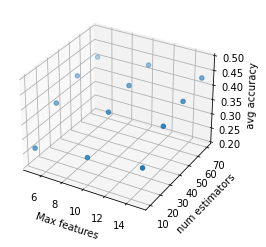

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
x = rf_params[:, 0]
y = rf_params[:, 1]
z = rf_params[:, 2]
ax.scatter(x,y,z)
ax.set_zlim(0.2, 0.5)
ax.set_xlabel('Max features')
ax.set_ylabel('num estimators')
ax.set_zlabel('avg accuracy')
plt.show()



[5, 10, 15, 20, 25, 30, 35, 40, 45]